In [1]:
import numpy as np
import matplotlib.pyplot as plt

from util import getData, softmax, cost, y2indicator, error_rate
from sklearn.utils import shuffle

i: 0 cost: 1882.3770005942272 error: 0.807
i: 50 cost: 1921.128197843018 error: 0.78
i: 100 cost: 1908.2625804016736 error: 0.775
i: 150 cost: 1898.1533549686892 error: 0.769
i: 200 cost: 1889.6149568171065 error: 0.767
i: 250 cost: 1882.1344404856554 error: 0.759
i: 300 cost: 1875.448354277878 error: 0.756
i: 350 cost: 1869.398061171477 error: 0.753
i: 400 cost: 1863.875906953728 error: 0.752
i: 450 cost: 1858.8028042362434 error: 0.748
i: 500 cost: 1854.1176401656885 error: 0.743
i: 550 cost: 1849.771610879167 error: 0.739
i: 600 cost: 1845.7248478518827 error: 0.733
i: 650 cost: 1841.9442324216795 error: 0.731
i: 700 cost: 1838.401889284115 error: 0.727
i: 750 cost: 1835.0741006541132 error: 0.724
i: 800 cost: 1831.940498082909 error: 0.721
i: 850 cost: 1828.9834465008307 error: 0.719
i: 900 cost: 1826.1875661587605 error: 0.716
i: 950 cost: 1823.5393561674214 error: 0.715
best_validation_error: 0.715


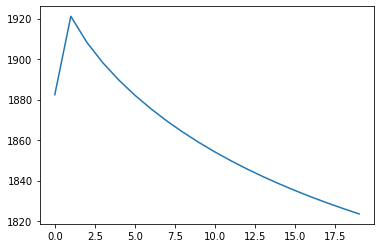

0.28600000000000003


In [2]:
class LogisticModel(object):
    def __init__(self):
        pass

    def fit(self, X, Y, Xvalid, Yvalid, learning_rate=1e-7, reg=0., epochs=1000, show_fig=False):
        Tvalid = y2indicator(Yvalid)

        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W = np.random.randn(D, K) / np.sqrt(D)
        self.b = np.zeros(K)

        costs = []
        best_validation_error = 1
        for i in range(epochs):
            # forward propagation and cost calculation
            pY = self.forward(X)

            # gradient descent step
            self.W -= learning_rate*(X.T.dot(pY - T) + reg*self.W)
            self.b -= learning_rate*((pY - T).sum(axis=0) + reg*self.b)

            if i % 50 == 0:
                pYvalid = self.forward(Xvalid)
                c = cost(Tvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()


    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)

    def predict(self, X):
        pY = self.forward(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)


def main():
    Xtrain, Ytrain, Xvalid, Yvalid = getData()
    
    model = LogisticModel()
    model.fit(Xtrain, Ytrain, Xvalid, Yvalid, show_fig=True)
    print(model.score(Xvalid, Yvalid))

if __name__ == '__main__':
    main()
